### Homework Week3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

np.__version__

'1.22.4'

In [3]:
df = pd.read_csv('housing.csv', sep=',')
df.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

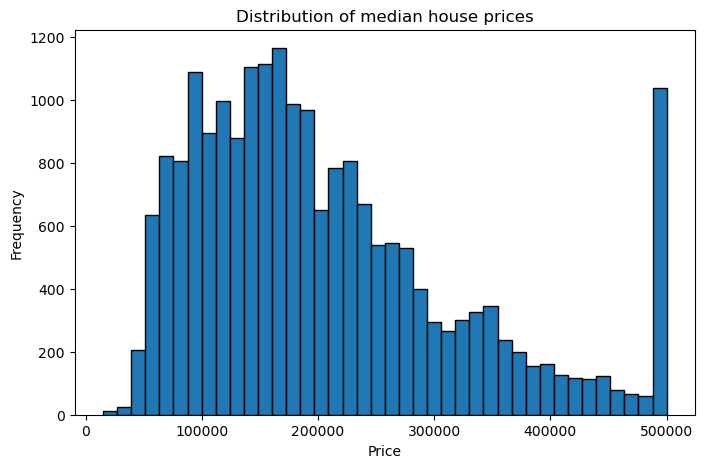

In [6]:
### Visualisation with Seaborn
import seaborn as sns

### Look at the median_house_value variable. Does it have a long tail?
plt.figure(figsize=(8, 5))
sns.histplot(df["median_house_value"], bins=40, alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of median house prices')

plt.show()

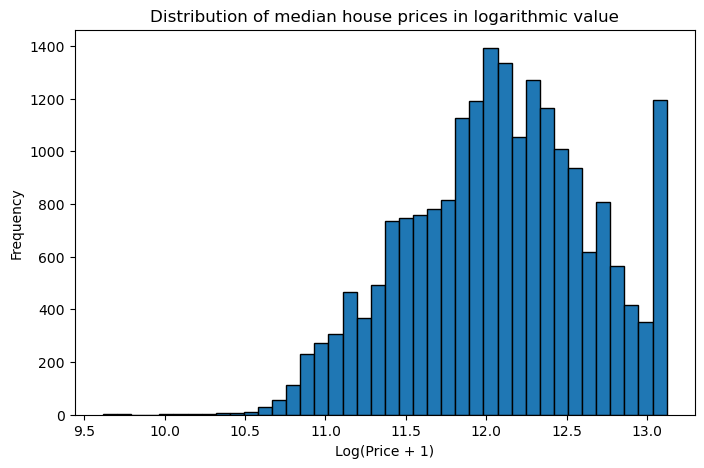

In [7]:
## How about shifting target variable to logarithmic form
log_price = np.log1p(df.median_house_value)
plt.figure(figsize=(8, 5))
sns.histplot(log_price, bins=40, alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of median house prices in logarithmic value')

plt.show()

### Prepare data that follows these instructions:

    - Select only the features from above and fill in the missing values with 0. 
    - Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
    - Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
    - Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [8]:
df.columns[df.isnull().any()]

Index(['total_bedrooms'], dtype='object')

In [9]:
def prepare_data(df, fillna_value=0):
    """
    Prepare dataset ready for parameter fitting.
    """
    df = df.copy()
    # Fill missing values with 0
    df['total_bedrooms'] = df['total_bedrooms'].fillna(fillna_value)
    # Create a column 'rooms_per_household'
    df['rooms_per_household'] = df['total_rooms'] / df['households']
    # Create a column 'bedrooms_per_room' 
    df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
    # Create a column 'population_per_household'
    df['population_per_household'] = df['population'] / df['households']
    
    return df

In [10]:
df_prepared = prepare_data(df)

df_prepared.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   rooms_per_household  bedrooms_per_room  population_per_household  
0             6.984127           0.146591                  2.555556  
1             6.238137           0.155797                  2.109842  
2             8.288136           0.129516                  2.802260  
3             5.817352           0.184458                  2.547945  
4             6.281853           0.172096                  2.181467

In [11]:
df_prepared['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### Question 1

What is the most frequent observation (mode) for the column ocean_proximity?

In [12]:
dict_make = dict(df_prepared['ocean_proximity'].value_counts())
dict(list(dict_make.items())[:1])

{'<1H OCEAN': 9136}

### Answer: <1H OCEAN

In [13]:
from sklearn.model_selection import train_test_split

## Split dataset into train and test sets
df_train_full, df_test = train_test_split(df_prepared, test_size=0.2, random_state=42)

## Split train set into train and validation sets
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train_orig = df_train["median_house_value"].values
y_val_orig = df_val["median_house_value"].values
y_test_orig = df_test["median_house_value"].values

# Drop target column from three pieces of datasets
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

#### Question 2

What are the two features that have the biggest correlation in train dataset?

In [16]:
df_train.corr()

longitude  latitude  housing_median_age  \
longitude                  1.000000 -0.925005           -0.099812   
latitude                  -0.925005  1.000000            0.002477   
housing_median_age        -0.099812  0.002477            1.000000   
total_rooms                0.036449 -0.025914           -0.363522   
total_bedrooms             0.063840 -0.059730           -0.324156   
population                 0.091670 -0.100272           -0.292476   
households                 0.049762 -0.063529           -0.306119   
median_income             -0.016426 -0.076805           -0.119591   
rooms_per_household       -0.034814  0.119118           -0.181275   
bedrooms_per_room          0.102320 -0.124507            0.129456   
population_per_household   0.011022 -0.002301            0.012167   

                          total_rooms  total_bedrooms  population  households  \
longitude                    0.036449        0.063840    0.091670    0.049762   
latitude                    -0.025914       -0.059730   -0.100272   -0.063529   
housing_median_age          -0.363522       -0.324156   -0.292476   -0.306119   
total_rooms                  1.000000        0.931546    0.853219    0.921441   
total_bedrooms               0.931546        1.000000    0.877340    0.979399   
population                   0.853219        0.877340    1.000000    0.906841   
households                   0.921441        0.979399    0.906841    1.000000   
median_income                0.198951       -0.009833   -0.000849    0.011925   
rooms_per_household          0.168926        0.010381   -0.076210   -0.085832   
bedrooms_per_room           -0.194185        0.078094    0.031592    0.058004   
population_per_household    -0.029452       -0.034301    0.064998   -0.032522   

                          median_income  rooms_per_household  \
longitude                     -0.016426            -0.034814   
latitude                      -0.076805             0.119118   
housing_median_age            -0.119591            -0.181275   
total_rooms                    0.198951             0.168926   
total_bedrooms                -0.009833             0.010381   
population                    -0.000849            -0.076210   
households                     0.011925            -0.085832   
median_income                  1.000000             0.394154   
rooms_per_household            0.394154             1.000000   
bedrooms_per_room             -0.616617            -0.500589   
population_per_household      -0.000454             0.001801   

                          bedrooms_per_room  population_per_household  
longitude                          0.102320                  0.011022  
latitude                          -0.124507                 -0.002301  
housing_median_age                 0.129456                  0.012167  
total_rooms                       -0.194185                 -0.029452  
total_bedrooms                     0.078094                 -0.034301  
population                         0.031592                  0.064998  
households                         0.058004                 -0.032522  
median_income                     -0.616617                 -0.000454  
rooms_per_household               -0.500589                  0.001801  
bedrooms_per_room                  1.000000                 -0.002851  
population_per_household          -0.002851                  1.000000

In [17]:
df_train[['total_bedrooms','households','total_rooms','population','population_per_household']].corr().sort_values(by='total_bedrooms', ascending=False)

total_bedrooms  households  total_rooms  population  \
total_bedrooms                  1.000000    0.979399     0.931546    0.877340   
households                      0.979399    1.000000     0.921441    0.906841   
total_rooms                     0.931546    0.921441     1.000000    0.853219   
population                      0.877340    0.906841     0.853219    1.000000   
population_per_household       -0.034301   -0.032522    -0.029452    0.064998   

                          population_per_household  
total_bedrooms                           -0.034301  
households                               -0.032522  
total_rooms                              -0.029452  
population                                0.064998  
population_per_household                  1.000000

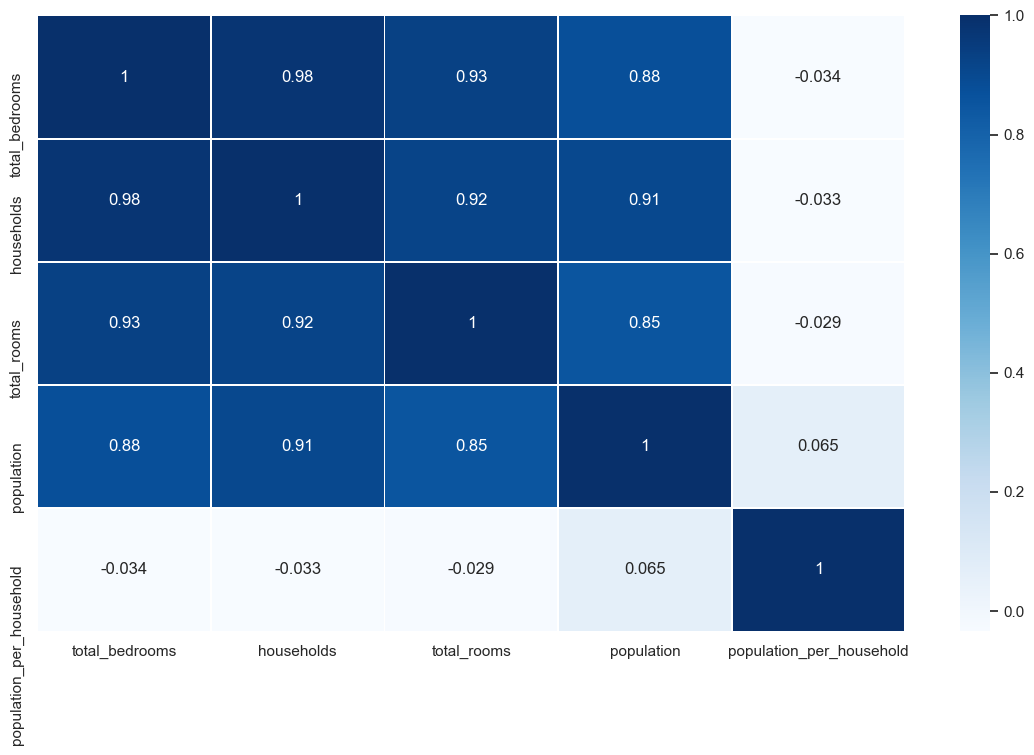

In [18]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df_train[['total_bedrooms','households','total_rooms','population','population_per_household']].corr()
sns.heatmap(corr, annot=True, linewidths=.5, cmap="Blues")
plt.show()

In [19]:
corr.unstack().sort_values(ascending = False)

total_bedrooms            total_bedrooms              1.000000
households                households                  1.000000
population                population                  1.000000
total_rooms               total_rooms                 1.000000
population_per_household  population_per_household    1.000000
total_bedrooms            households                  0.979399
households                total_bedrooms              0.979399
total_rooms               total_bedrooms              0.931546
total_bedrooms            total_rooms                 0.931546
households                total_rooms                 0.921441
total_rooms               households                  0.921441
households                population                  0.906841
population                households                  0.906841
total_bedrooms            population                  0.877340
population                total_bedrooms              0.877340
total_rooms               population                  0

### Answer: total_bedrooms and households


In [20]:
y_train_orig[:10]

array([241400., 500001.,  64100., 277200., 417000., 500001., 367700.,
       500001., 376200.,  53500.])

In [21]:
### Turning column 'median_house_value'
### Criteria: if the median_house_value is above its mean value then set it to 1 and 0 otherwise.

y_train_binary = np.where(y_train_orig >= np.mean(y_train_orig), 1, 0)
y_train_binary[:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

#### Question 3: 

What is the value of mutual information?

In [22]:
from sklearn.metrics import mutual_info_score

categorical_col = ['ocean_proximity']

def calculate_mi(series):
    return mutual_info_score(series, y_train_binary)

df_mi = df_train[categorical_col].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

MI
ocean_proximity  0.101384

### Answer: 0.10

In [23]:
def grab_col_names(dataframe):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "object"]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "object"]
    return cat_cols, num_cols

categorical, numerical = grab_col_names(df_train)

print(f"Column with format category or object: {categorical}")
print(f"Column with format integer or float: {numerical}")

Column with format category or object: ['ocean_proximity']
Column with format integer or float: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']


In [24]:
from sklearn.feature_extraction import DictVectorizer

train_dict = df_train[categorical + numerical].to_dict(orient='records')
train_dict[0]

{'ocean_proximity': '<1H OCEAN',
 'longitude': -119.67,
 'latitude': 34.43,
 'housing_median_age': 39.0,
 'total_rooms': 1467.0,
 'total_bedrooms': 381.0,
 'population': 1404.0,
 'households': 374.0,
 'median_income': 2.3681,
 'rooms_per_household': 3.9224598930481283,
 'bedrooms_per_room': 0.25971370143149286,
 'population_per_household': 3.7540106951871657}

In [26]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [27]:
X_train = dv.transform(train_dict)

In [28]:
dv.get_feature_names()

C:\Users\rizdi\miniconda3\envs\env_python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['bedrooms_per_room',
 'households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'population_per_household',
 'rooms_per_household',
 'total_bedrooms',
 'total_rooms']

In [29]:
y_train = np.where(y_train_orig >= np.mean(y_train_orig), 1, 0)
y_val = np.where(y_val_orig >= np.mean(y_val_orig), 1, 0)
y_test = np.where(y_test_orig >= np.mean(y_test_orig), 1, 0)

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

#### Question 4

Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [31]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [32]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_val)
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.84


### Answer: 0.84

#### Question 5

Which of following feature has the smallest difference? 

In [33]:
features = categorical + numerical
features

['ocean_proximity',
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

### Feature Elimination

In [34]:
original_score = accuracy

for x in features:
    subset = features.copy()
    subset.remove(x)
    
    train_dict = df_train[subset].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    X_train = dv.transform(train_dict)
    
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    print(x, original_score - score, score)

ocean_proximity 0.019505813953488382 0.8204941860465116
longitude 0.00618217054263559 0.8338178294573644
latitude 0.005213178294573573 0.8347868217054264
housing_median_age 0.008846899224806193 0.8311531007751938
total_rooms 0.0027906976744185297 0.8372093023255814
total_bedrooms 0.004001937984496107 0.8359980620155039
population 0.012480620155038702 0.8275193798449613
households 0.005939922480620141 0.8340600775193798
median_income 0.05245155038759686 0.7875484496124031
rooms_per_household 0.0027906976744185297 0.8372093023255814
bedrooms_per_room 0.0030329457364340895 0.8369670542635659
population_per_household 0.003517441860465098 0.8364825581395349


### Answer: smallest difference - "total_rooms"

#### Question 6

Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

In [35]:
df_prepared.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   rooms_per_household  bedrooms_per_room  population_per_household  
0             6.984127           0.146591                  2.555556  
1             6.238137           0.155797                  2.109842  
2             8.288136           0.129516                  2.802260  
3             5.817352           0.184458                  2.547945  
4             6.281853           0.172096                  2.181467

In [36]:
df = df_prepared.copy()
df['median_house_value'] = np.log1p(df['median_house_value'])

In [37]:
## Split dataset into train and test sets
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)

## Split train set into train and validation sets
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [38]:
print(len(df_train))
print(len(df_val))
print(len(df_test))

12384
4128
4128


In [39]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [40]:
y_train = df_train["median_house_value"].values
y_val = df_val["median_house_value"].values
y_test = df_test["median_house_value"].values

# Drop target column from three pieces of datasets
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [41]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [42]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [43]:
X_train = dv.transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [44]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [45]:
for x in [0, 0.01, 0.1, 1, 10]:
    ## Fit Ridge regression with data that still has original 'median_house_value' in log form
    model = Ridge(alpha=x, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    MSE = np.sqrt(mean_squared_error(y_pred, y_val))
    
    print(x, round(MSE, 3))

0 0.524
0.01 0.524
0.1 0.524
1 0.524
10 0.524


### Answer: 0
